In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
image_path = input("Enter the path to the image file: ")

Enter the path to the image file: /home/hamish/Downloads/ch2_ohr_ncp_20190906T1246532096_d_img_d18/data/calibrated/20190906/ch2_ohr_ncp_20190906T1246532096_d_img_d18.img


Line Value: 63230
Sample Value: 12000


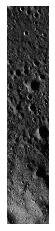

In [3]:
xml_file_path = image_path[:-3]+'xml'


namespaces = {
    'pds': 'http://pds.nasa.gov/pds4/pds/v1',
    'isda': 'https://isda.issdc.gov.in/pds4/isda/v1'
}

tree = ET.parse(xml_file_path)
root = tree.getroot()

line_element = root.find(".//pds:Axis_Array[pds:axis_name='Line']/pds:elements", namespaces=namespaces)
sample_element = root.find(".//pds:Axis_Array[pds:axis_name='Sample']/pds:elements", namespaces=namespaces)

if line_element is not None:
    line_value = int(line_element.text)
    print(f"Line Value: {line_value}")
else:
    print("Line element not found in XML.")

if sample_element is not None:
    sample_value = int(sample_element.text)
    print(f"Sample Value: {sample_value}")
else:
    print("Sample element not found in XML.")

image_width = sample_value
image_height = line_value

data_type = np.uint8

with open(image_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=data_type, count=image_width * image_height)

image_array = raw_data.reshape((image_height, image_width))

plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.show()